# Regression Boston Housing 

## 01| Dataset Information

Data berasal dari Boston Standard Metropolitan Statistical Area (SMSA) pada tahun 1970. Atributnya didefinisikan sebagai berikut:
* crim: tingkat kejahatan per kapita menurut kota
* zn: proporsi tanah kavling untuk perumahan yang lebih dari 25.000 sq.ft.
* indus: proporsi hektar untuk bisnis non-ritel per kota
* chas: 1 = jika saluran membatasi sungai Charles; 0 = sebaliknya)
* nox: konsentrasi oksida nitrat (bagian per 10 juta)
* rm: rata-rata jumlah kamar per hunian
* age: proporsi unit yang ditempati pemilik dan dibangun sebelum 1940
* dis: jarak tertimbang ke lima pusat pekerjaan di Boston
* rad: jarak ke jalan raya utama
* tax: tarif pajak properti nilai penuh per 10.000 dolar
* ptratio: rasio murid-guru menurut kota 12. 
* b: 1000(Bk−0.63)2 di mana Bk adalah proporsi orang kulit hitam menurut kota 13. 
* lstat: persentase status penduduk kelas bawah
* medv: Nilai rata-rata rumah yang ditempati pemilik di 1000s dolar

## 03| Importing Library

In [4]:
# Library stat and visual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## 04| Loading Dataset

In [5]:
df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().any()

False

Dataset bersih dari missing value dan data duplikat. Sehingga dataset tidak perlu cleansing lagi dan bisa langsung digunakan jika outlier tidak perlu dihandling.

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Kita ambil satu sampel kolom yaitu kolom crim. Dari kolom crim bisa kita lihat bahwa rata-rata > quartile 2 (median). Data kemungkinan akan skew kekanan. Jika dilihat juga nilai maxnya adalah 88.9 sangat jauh dari nilai tengah dan ini merupakan sebuah outlier.

## 05| Splitting Data

Dalam workflow ini, saya akan menggunakan cara 'think simple'. Artinya saya akan menggunakan machine learning terlebih dahulu dan mendapatkan score agar bisa menjadi benchmark dari score model yang dibuat setelah dan sebelum EDA.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns='medv')
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 06| Scalling Data

In [12]:
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')
df_train.columns, df_test.columns

(Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'b', 'lstat'],
       dtype='object'),
 Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'b', 'lstat'],
       dtype='object'))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values
X_train_scaled.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas
0,0.168763,0.00,0.642963,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625,0
1,0.006950,0.00,0.274074,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982,0
2,0.000288,0.35,0.197037,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322,0
3,0.079146,0.00,0.642963,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923,0
4,0.008056,0.00,0.274074,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521,0


In [15]:
# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values
X_test_scaled.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas
0,0.000930,0.0,0.122593,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711,0
1,0.000533,0.4,0.210000,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669,1
2,0.001087,0.0,1.000000,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883,0
3,0.000928,0.0,0.372963,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581,0
4,0.057112,0.0,0.642963,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808,0


## 07| Training Data

#### a| First methode just using Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [41]:
# Modeling
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)
model

LinearRegression()

In [42]:
# Scoring
model.score(X_test_scaled, y_test)

0.668759493535632

#### b| Second methode using Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

##### Polynomial degree = 2

In [20]:
# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

In [21]:
# modeling with degree = 2
model = lr.fit(X_train_quadratic, y_train)
# Scoring
model.score(X_test_quadratic, y_test)

0.7931406379228623

## 08| Exploratory Data Analysis (EDA)

Saya akan coba memakmsimalkan score sebelumnya dengan melakukan EDA. Penting diketahui, bahwa EDA tidak menjamin score dari model akan lebih baik.

In [47]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


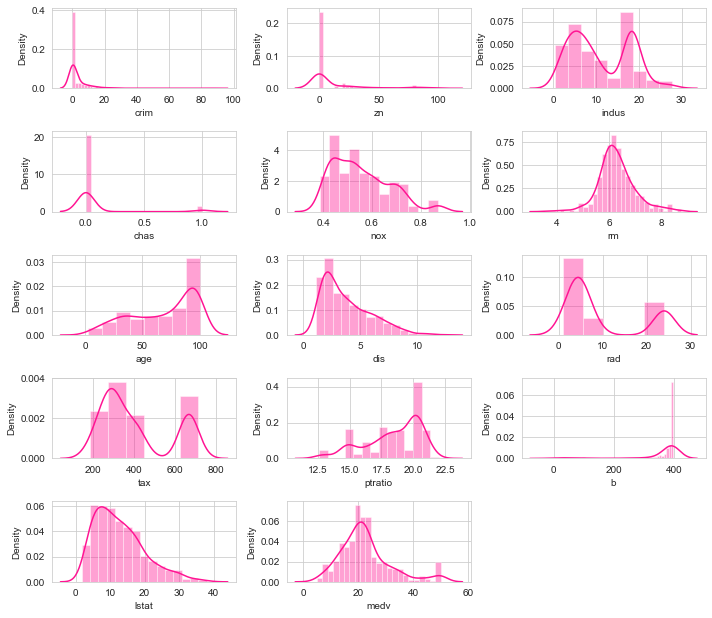

In [48]:
# Visualisasi dengan distplot untuk melihat distribusi data
plt.figure(figsize=(10,10))
for i in enumerate(df.describe().columns):
  plt.subplot(6,3, i[0]+1)
  sns.distplot(df[i[1]], color='deeppink', kde=True)
plt.tight_layout()
plt.show()

Data cenderung skew kekanan.

### b| Multicolliniearity Analysis

#### Show correlation of data

In [49]:
#Correlation to taget
df.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

<AxesSubplot:>

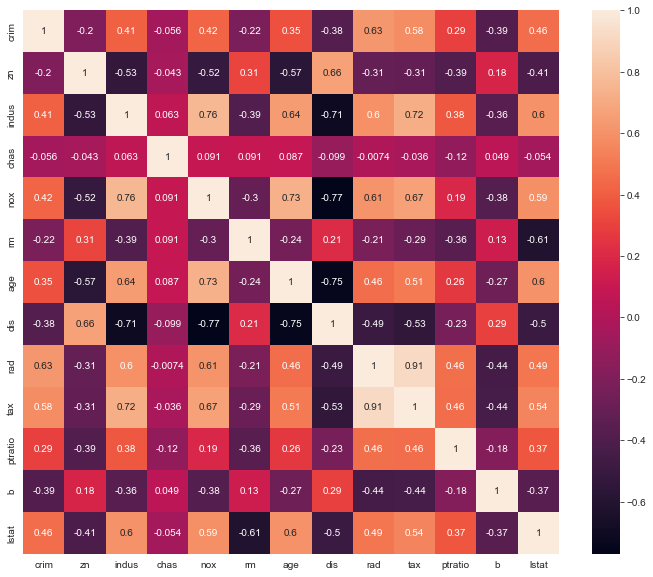

In [50]:
# Show corrlation of feature (X)  
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)

Dari heatmap diatas, terdapat kolom2 yg memiliki korelasi 0.8 yg menunjukkan high multicollinearity yaitu ['tax', 'rad', 'indus', 'nox'].
Cek lagi dengan score VIF

##### Heatmap 

In [51]:
#Data dengan handling multicoloniearity dari heatmap.
X_heatmap = X.drop(['indus','nox','tax','rad'], axis=1)
X_heatmap.columns

Index(['crim', 'zn', 'chas', 'rm', 'age', 'dis', 'ptratio', 'b', 'lstat'], dtype='object')

##### VIF Score

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Show VIF score
def calc_vif(X):
    # Calculating VIF values
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [54]:
vif_score = calc_vif(X)
vif_score

,variables,VIF
0,crim,2.100373
1,zn,2.844013
2,indus,14.485758
3,chas,1.152952
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
7,dis,14.699652
8,rad,15.167725
9,tax,61.227274


pilih yg paling terbesar nilai VIFnya.

In [55]:
#Data dengan handling multicolonearity dengan VIF score.
X_vif = X.drop(['ptratio','rm'], axis=1)
X_vif.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'b',
       'lstat'],
      dtype='object')

## 09| Train and Test after handling multicollonierity

#### Heatmap

In [56]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y, test_size=0.2, random_state=42)

# scalling
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')

# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values

# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values

# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

# modeling with degree = 2
model_hm = lr.fit(X_train_quadratic, y_train)

# Scoring
model_hm.score(X_test_quadratic, y_test)

0.8022765721278212

#### VIF Score

In [57]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.2, random_state=42)

# scalling
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')

# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values

# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values

# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

# modeling with degree = 2
model_vif = lr.fit(X_train_quadratic, y_train)

# Scoring
model_vif.score(X_test_quadratic, y_test)

0.7645454750244923

Kesimpulan dari keduanya adalah bahwa handling multicolliniearity menggunakan analisis heatmap menunjukkan skor yg lebih tinggi.

### c| Outlier Analysis

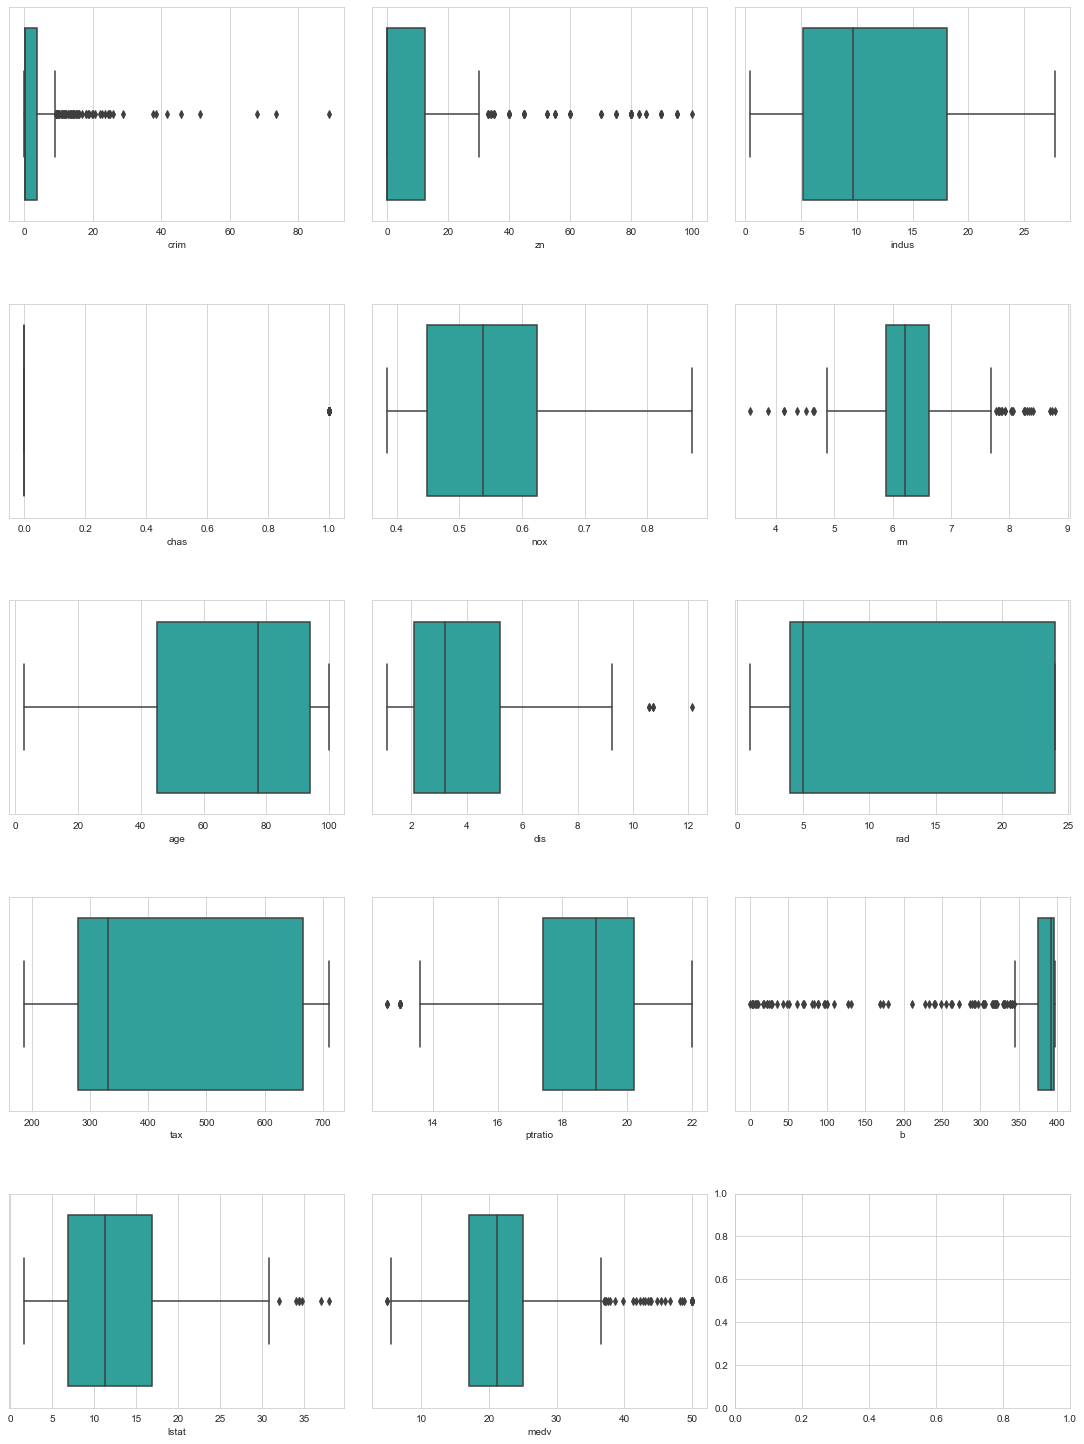

In [58]:
# Melihat outlier
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(15,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(x=col, data=df, color='lightseagreen', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### IQR Method

In [59]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [60]:
df_clear_iqr = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [61]:
print(df.shape)
print(df_clear_iqr.shape)

(506, 14)
(268, 14)


#### Z-Score

In [62]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(df[df.columns]))
threshold(z,df[df.columns])

With threshold 3.0 data loss is 17.98%
With threshold 3.2 data loss is 15.81%
With threshold 3.4 data loss is 13.83%
With threshold 3.6 data loss is 11.66%
With threshold 3.8 data loss is 3.56%
With threshold 4.0 data loss is 1.38%
With threshold 4.2 data loss is 1.19%
With threshold 4.4 data loss is 1.19%
With threshold 4.6 data loss is 0.99%
With threshold 4.8 data loss is 0.99%


In [64]:
df_clear_z=df[(z<3.6).all(axis=1)]

In [65]:
print(df.shape)
print(df_clear_z.shape)

(506, 14)
(447, 14)


## 10| Train and Test after handling outlier

#### IQR Treatment

In [66]:
# Splitting
X = df_clear_iqr.drop(columns='medv')
y = df_clear_iqr.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')

# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values

# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values

# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

# modeling with degree = 2
model_vif = lr.fit(X_train_quadratic, y_train)

# Scoring
model_vif.score(X_test_quadratic, y_test)

-3.8441893047112465

#### Z-Score

In [67]:
# Splitting
X = df_clear_z.drop(columns='medv')
y = df_clear_z.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')

# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values

# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values

# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

# modeling with degree = 2
model_vif = lr.fit(X_train_quadratic, y_train)

# Scoring
model_vif.score(X_test_quadratic, y_test)

0.802464852536811

Kesimpulan bahwa model dengan handling outlier menggunakan z-score lebih baik. 

#### Kesimpulan
Karena score model antara handling multicolonierity (heatmap) sama dengan handling outlier menggunakan z-score, kita coba combine keduanya.

## 11| Train and Test after handling outlier and multicoll.

In [38]:
# datset (heatmap vs z-sore)
df_heatmap_z = df_clear_z.drop(['indus','nox','tax','rad'], axis=1)

# Splitting
X = df_heatmap_z.drop(columns='medv')
y = df_heatmap_z.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling
df_train = X_train.drop(columns='chas')
df_test = X_test.drop(columns='chas')

# dataframe fit_transform train_scaled 
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

# dataframe chas column
X_train_scaled['chas'] = X_train.chas.values

# dataframe train_scaled transform
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

# dataframe chas column
X_test_scaled['chas'] = X_test.chas.values

# Polynomial with degree = 2
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train_scaled)
X_test_quadratic = quadratic.transform(X_test_scaled)

# modeling with degree = 2
model_vif = lr.fit(X_train_quadratic, y_train)

# Scoring
model_vif.score(X_test_quadratic, y_test)

0.7551741251315356

Dari kombinasi keduanya, ternyata score tidak lebih baik. Jadi kita bisa menggunakan salah satunya antara keduanya. Namun, disini saya akan coba membuat benchmark dengan model lain yaitu XGBoost.

## 12| Benchmark

#### a| XGBoost

In [23]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
# jcopml
from jcopml.plot import plot_missing_value, plot_residual
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import load_model, save_model
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import random_search_params as rsp
# xgboost
from xgboost import XGBRegressor

In [24]:
X = df.drop(columns='medv')
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [25]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2),['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat']),
    ('categoric', cat_pipe(),['chas']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

xgb_model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
xgb_model.fit(X_train, y_train)

print(xgb_model.best_params_)
print(xgb_model.score(X_train, y_train), xgb_model.best_score_, xgb_model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.4370861069626263, 'algo__gamma': 8, 'algo__learning_rate': 0.1575132049977973, 'algo__max_depth': 7, 'algo__n_estimators': 182, 'algo__reg_alpha': 0.0025113061677390002, 'algo__reg_lambda': 0.06870614282613305, 'algo__subsample': 0.4668543055695109}
0.9922017478845107 0.8423409315455693 0.8514007662562586


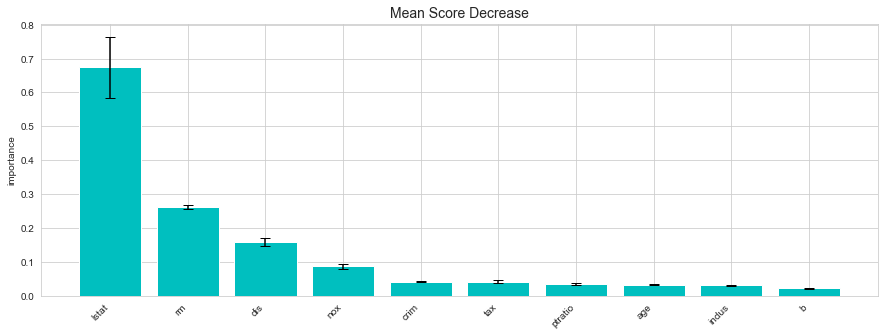

In [27]:
#Feautre Engineering
df_imp = mean_score_decrease(X_train, y_train, xgb_model, plot=True, topk=10)

In [31]:
df_imp.feature.to_list()

['lstat', 'rm', 'dis', 'nox', 'crim', 'tax', 'ptratio', 'age', 'indus', 'b']

Akan saya gunakan beberapa kolom yaitu ['lstat', 'rm', 'dis', 'nox'].

In [37]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2),['lstat', 'rm', 'dis', 'nox']),
    ('categoric', cat_pipe(),['chas']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

xgb_model2 = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
xgb_model2.fit(X_train, y_train)

print(xgb_model2.best_params_)
print(xgb_model2.score(X_train, y_train), xgb_model2.best_score_, xgb_model2.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.14651354905174693, 'algo__gamma': 4, 'algo__learning_rate': 0.06648257162269167, 'algo__max_depth': 3, 'algo__n_estimators': 154, 'algo__reg_alpha': 0.003576122356264065, 'algo__reg_lambda': 0.0033961095337366647, 'algo__subsample': 0.7847684335570796}
0.9566138369125696 0.7999254066977803 0.8460183378814441


Model menunjukkan score yang sama. sehingga model setelah feature engineering kita pilih karena lebih ringan dari segi komputasi. Kemudian saya akan mencoba melihat plot residual.

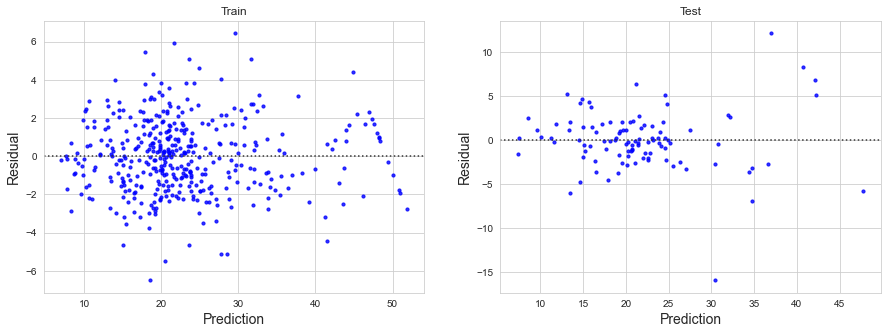

In [38]:
#Plot residual
plot_residual(X_train, y_train, X_test, y_test, xgb_model2, lowess=False)

Dari plot ini dapat diambil kesimpulan bahwa data sudah simetri. artinya tidak perlu melakukan treatment lagi.

In [45]:
# predictions on the test set
predictions = xgb_model2.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

MAE:  2.260017093022664
MSE:  11.29205782046829
RMSE:  3.3603657271892726
Variance Regression Score:  0.8460195715471731


## 13| Kesimpulan

Dari beberapa step diatas, dapat diambil kesimpulan sebagai berikut:

__1) Linear Regression__

Hasil dari model ini memiliki score tertinggi 80% dengan treatment multicolonearity atau handling outlier dengan z_score.

__2) XGBoost__

Hasil tertinggi 85%.

Dari kedua model, perbedaan score tidak jauh beda. Kemungkinan scorenya memang pada range ini.

By muhamadsahri08@gmail.com